In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<h1> Pomiar szeregu rozcieńczeń DNA łososiowego w wodzie MQ za pomocą spektrofotometru </h1>
- dnia 16.01.19
- 3 powtórzenia każdego pomiaru (pobranego z tej samej próbki)
- blank na wodę MQ

In [3]:
nano = pd.read_csv("nano-drop-calibration.csv")
#nano.columns

Ten plik csv został wygenerowany przez nanodropa i ma bardzo dużo kolumn. Ja do swojej analizy używam wybrane:
- Sample Name(zawiera info o koncentracji wg mojego rozcienczenia),
- "Concentration" - podaje iformacje jaka koncentracja została wyliczona przez NanoDrop na podstawie zmierzonego A260
- "A 260"
- 260/280 
- 260/230
-230

UWAGA - raport csv wysłany przez oprogramowanie NanoDrop nie podaje jednostek koncentracji, jaką wyliczył -trzeba upewnić się jakie tam są na podstawie A260: *A260 of 1.0 = 50µg/ml pure dsDNA
- ponadto plik csv nie zawiera spektrum poza wartościami 220-350
<h3> Poniżej wybrane komórki z tabeli csv wygenerowanej przez oprogramowanie NanoDropa </h3>

In [5]:
df = pd.DataFrame()
df["my_concentration [ng/ml]"] = nano["Sample Name"]
df["calculated_concentration [ng/ml]"] = nano["Concentration"].apply(lambda x: x*1000)
df["abs260"] = nano["A260"]
df["260/280"] = nano["260/280"]
df["260/230"] = nano["260/230"]

mean = df.groupby("my_concentration [ng/ml]", as_index=False).mean()
std = df.groupby("my_concentration [ng/ml]", as_index=False).std()
df

,my_concentration [ng/ml],calculated_concentration [ng/ml],abs260,260/280,260/230
0,0.12,234.0,0.0047,-0.65,0.31
1,0.12,123.0,0.0025,-0.30,0.26
2,0.12,752.0,0.0150,-0.88,1.79
3,1.25,-207.0,-0.0041,5.70,-0.46
4,1.25,-1290.0,-0.0258,2.45,0.51
5,1.25,396.0,0.0079,-0.86,0.60
6,12.50,-983.0,-0.0197,0.48,0.50
7,12.50,653.0,0.0131,84.34,1.08
8,12.50,917.0,0.0183,-4.19,2.05
9,125.00,821.0,0.0164,24.72,2.34


<h2>Statystyka: średnia arytmetyczna poszczególnych kolumn </h2>

In [6]:
mean

,my_concentration [ng/ml],calculated_concentration [ng/ml],abs260,260/280,260/230
0,0.12,3.696667e+02,0.007400,-0.610000,0.786667
1,1.25,-3.670000e+02,-0.007333,2.430000,0.216667
2,12.50,1.956667e+02,0.003900,26.876667,1.210000
3,125.00,8.000000e+02,0.016000,46.680000,4.183333
4,250.00,1.445333e+03,0.028900,15.216667,1.263333
5,500.00,1.809333e+03,0.036200,-1.426667,0.320000
6,1000.00,1.520333e+03,0.030400,1.596667,0.940000
7,2000.00,2.839333e+03,0.056767,1.843333,1.713333
8,4000.00,4.849333e+03,0.096967,1.716667,2.013333
9,8000.00,8.476667e+03,0.169533,1.740000,2.883333


<h2> Statystyka - odchylenie standardowe </h2>

In [7]:
std.iloc[:, 1:]

,calculated_concentration [ng/ml],abs260,260/280,260/230
0,3.357296e+02,0.006673,0.292062,0.869272
1,8.543120e+02,0.017081,3.280046,0.587736
2,1.029255e+03,0.020603,49.819456,0.783135
3,2.816026e+01,0.000529,72.141869,3.815054
4,3.054576e+02,0.006083,15.607634,0.594755
5,8.356616e+02,0.016728,4.133392,2.463067
6,1.724017e+02,0.003422,2.749624,1.414178
7,3.051333e+02,0.006068,0.240901,0.025166
8,4.330466e+02,0.008651,0.175594,0.075719
9,5.302097e+02,0.010637,0.207846,0.763042


 <h4> wg. producenta maszyna ma: </h4>
- Detection limit:
    - 0.04 mg/ml BSA
    - 0.75 ng/µl dsDNA (to jest 750 ng/ml)
- Maximum Concentration:
    - 1125 mg/ml BSA
    - 37500 ng/µl dsDNA (to jest 37500000 ng/ml)
    
Zaznaczę te wartości na wykresie
<p> wszystkie wykresy w tym raporcie mają odchylenie standardowe dla populacji jako errorbars </p>

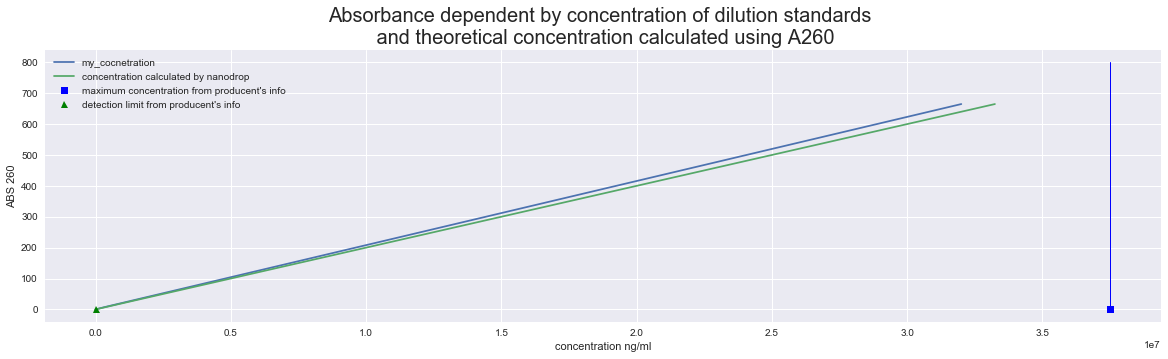

In [8]:
plt.figure(figsize=(20.0, 5.0))
plt.style.use(style="seaborn")
plt.title("Absorbance dependent by concentration of dilution standards \n and theoretical concentration calculated using A260", fontsize=20.0)
plt.ylabel("ABS 260")
plt.xlabel("concentration ng/ml")
plt.plot(mean["my_concentration [ng/ml]"], mean["abs260"], label="my_cocnetration")
#plt.errorbar(mean["my_concentration [ng/ml]"], mean["abs260"], yerr=std["abs260"])
plt.plot(mean["calculated_concentration [ng/ml]"], mean["abs260"], label="concentration calculated by nanodrop")
plt.plot(37500000,0, "bs", label="maximum concentration from producent's info")
plt.plot([37500000, 37500000], [0, 800], 'b-', lw=1)
plt.plot(750, 0, "g^", label="detection limit from producent's info")
plt.legend()

Wnioski, obserwacje:
- maksynalna koncentracja dsDNA, która może być mierzona wg. producenta na tym instrumencie nie została osiągnięta podczas rozpuszczania DNA łososiowego - DNA rozpusciło się dopiero przy mniejszej koncentracji (problemy z rozpuszczeniem)
- należy eksperyment uzupełnić o dodatkowy pomiar stężeń, które są maksymalne wg. producenta i przygotować odpowiednie rozcieńczenie 
- koncentracja dsDNA mierzona na instrumencie jest zbliżona do koncentracji sporządzonej w szeregu rozcieńczeń DNA łososiowego

<h4> Wykluczam ostatni pomiar żeby mieć większy zoom na wykresie</h4>

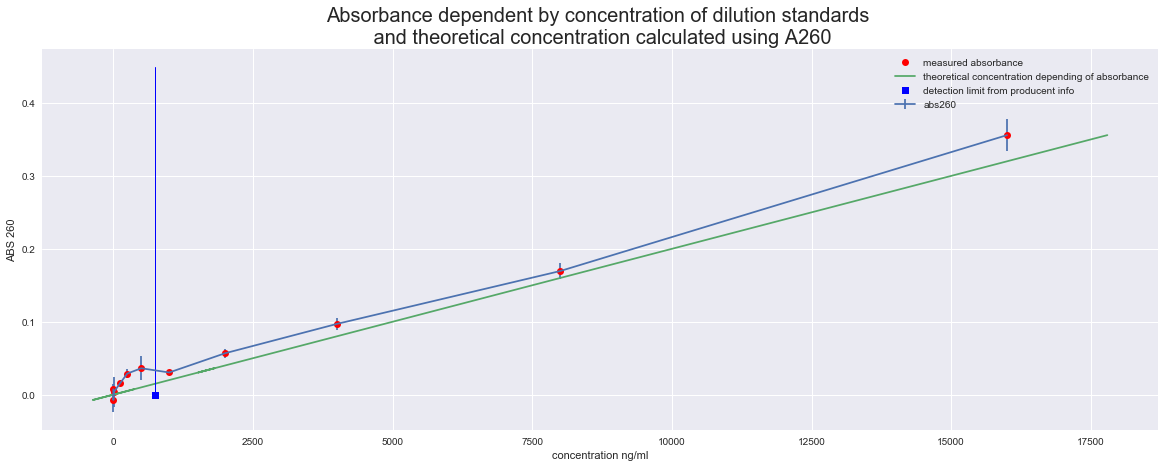

In [9]:
plt.figure(figsize=(20.0, 7.0))
plt.style.use(style="seaborn")
plt.title("Absorbance dependent by concentration of dilution standards \n and theoretical concentration calculated using A260", fontsize=20.0)
plt.ylabel("ABS 260")
plt.xlabel("concentration ng/ml")
plt.plot(mean["my_concentration [ng/ml]"].iloc[:11], mean["abs260"].iloc[:11],"ro", label="measured absorbance")
plt.errorbar(mean["my_concentration [ng/ml]"].iloc[:11], mean["abs260"].iloc[:11], yerr=std["abs260"].iloc[:11])
plt.plot(mean["calculated_concentration [ng/ml]"].iloc[:11], mean["abs260"].iloc[:11], label="theoretical concentration depending of absorbance")
plt.plot(750, 0, "bs", label="detection limit from producent info")
plt.plot([750, 750], [0, 0.45], 'b-', lw=1)
plt.legend()

<h3> wnioski: </h3>
- dolny limit pomiaru dla maszyny low - odchylenie standardowe dla blanka

<h2> Wykres z obcięciem punktów poniżej instrument detection limit </h2>

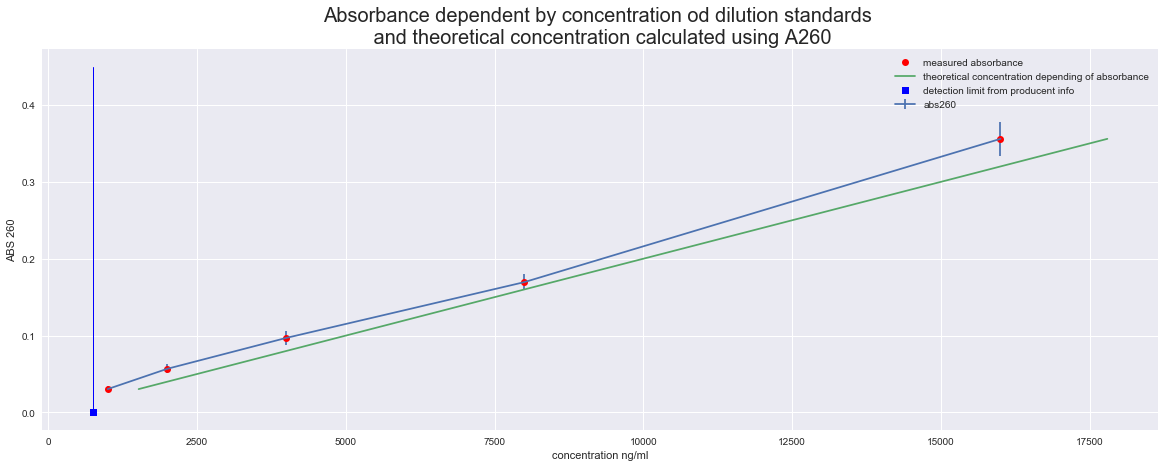

In [10]:
x=6
y=11
plt.figure(figsize=(20.0, 7.0))
plt.style.use(style="seaborn")
plt.title("Absorbance dependent by concentration od dilution standards \n and theoretical concentration calculated using A260", fontsize=20.0)
plt.ylabel("ABS 260")
plt.xlabel("concentration ng/ml")
plt.plot(mean["my_concentration [ng/ml]"].iloc[x:y], mean["abs260"].iloc[x:y],"ro", label="measured absorbance")
plt.errorbar(mean["my_concentration [ng/ml]"].iloc[x:y], mean["abs260"].iloc[x:y], yerr=std["abs260"].iloc[x:y])
plt.plot(mean["calculated_concentration [ng/ml]"].iloc[x:y], mean["abs260"].iloc[x:y], label="theoretical concentration depending of absorbance")
plt.plot(750, 0, "bs", label="detection limit from producent info")
# draw vertical line from (0.0, 750) to (0.45, 750)
plt.plot([750, 750], [0, 0.45], 'b-', lw=1)

# draw diagonal line from (70, 90) to (90, 200)
#plt.plot([70, 90], [90, 200], 'k-')
plt.legend()

<h2> Ratio - czystość próbek (dwa wykresy z tymi samymi danymi)- żeby mieć większy zoom </h2>

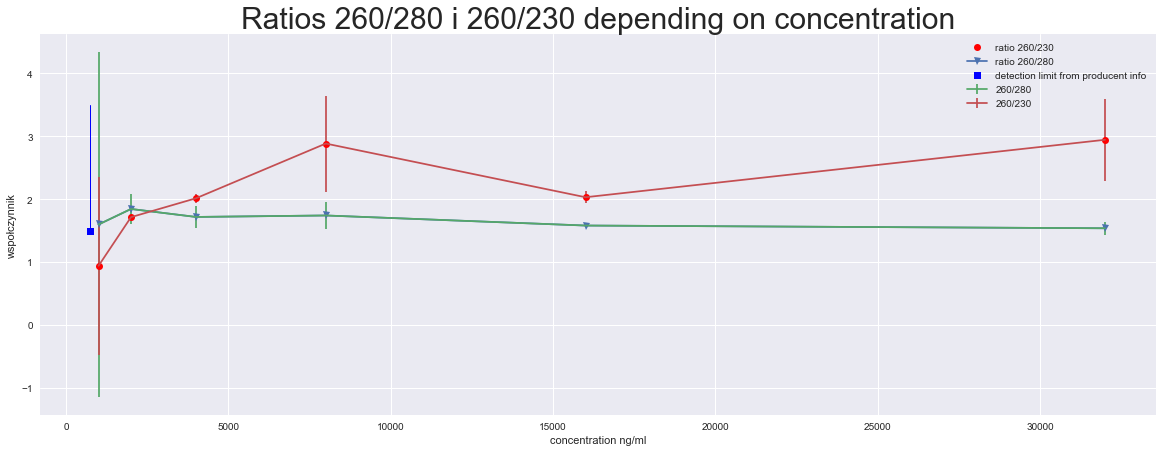

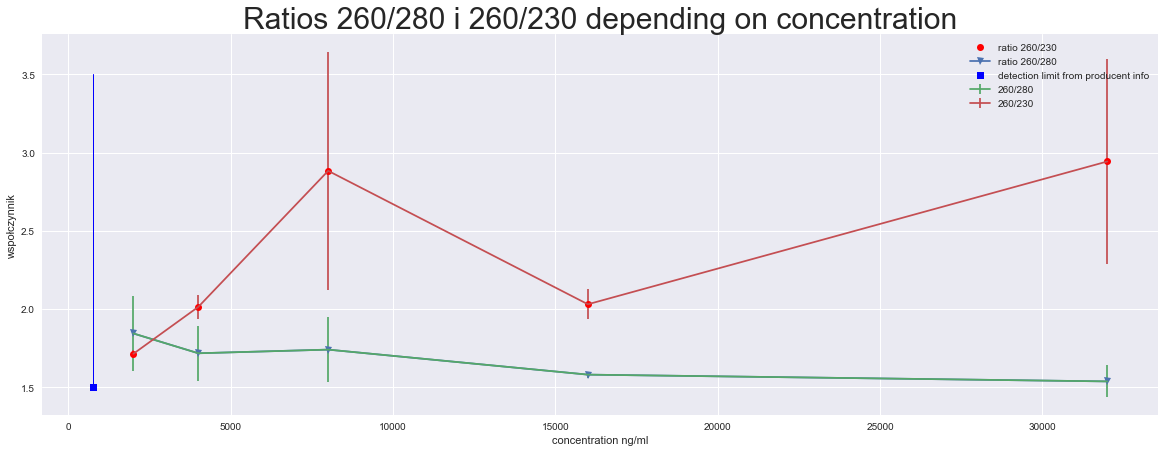

In [11]:
x=6
y=12
plt.figure(figsize=(20.0, 7.0))
plt.style.use(style="seaborn")
plt.plot(mean["my_concentration [ng/ml]"].iloc[x:y], mean["260/230"].iloc[x:y],"ro", label="ratio 260/230")
plt.title("Ratios 260/280 i 260/230 depending on concentration", fontsize=30.0)
plt.ylabel("wspołczynnik")
plt.xlabel("concentration ng/ml")
plt.plot(mean["my_concentration [ng/ml]"].iloc[x:y], mean["260/280"].iloc[x:y],"v-", label="ratio 260/280")
plt.errorbar(mean["my_concentration [ng/ml]"].iloc[x:y], mean["260/280"].iloc[x:y], yerr=std["260/280"].iloc[x:y])

plt.errorbar(mean["my_concentration [ng/ml]"].iloc[x:y], mean["260/230"].iloc[x:y], yerr=std["260/230"].iloc[x:y])

plt.plot(750, 1.5, "bs", label="detection limit from producent info")
# draw vertical line from (0.0, 750) to (0.45, 750)
plt.plot([750, 750], [1.5, 3.5], 'b-', lw=1)
plt.legend()
x=7
y=12
plt.figure(figsize=(20.0, 7.0))
plt.style.use(style="seaborn")
plt.plot(mean["my_concentration [ng/ml]"].iloc[x:y], mean["260/230"].iloc[x:y],"ro", label="ratio 260/230")
plt.title("Ratios 260/280 i 260/230 depending on concentration", fontsize=30.0)
plt.ylabel("wspołczynnik")
plt.xlabel("concentration ng/ml")
plt.plot(mean["my_concentration [ng/ml]"].iloc[x:y], mean["260/280"].iloc[x:y],"v-", label="ratio 260/280")
plt.errorbar(mean["my_concentration [ng/ml]"].iloc[x:y], mean["260/280"].iloc[x:y], yerr=std["260/280"].iloc[x:y])

plt.errorbar(mean["my_concentration [ng/ml]"].iloc[x:y], mean["260/230"].iloc[x:y], yerr=std["260/230"].iloc[x:y])

plt.plot(750, 1.5, "bs", label="detection limit from producent info")
# draw vertical line from (0.0, 750) to (0.45, 750)
plt.plot([750, 750], [1.5, 3.5], 'b-', lw=1)
plt.legend()

- stosunek 260/280 miesci się w normie dla "czystej" próbki
- stosunek 260/230 ma duże rozbieżności w wartościach, pomimo że do pomiaru była nakładana ta sama próbka
- stosunek 260/230 ma nieprawidłowe wartości, tak jakby próbka była zanieczyszczona, pomimo sterylenj pracy